In [2]:
#%pip install tsfresh
#%pip install dfply



In [16]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tsfresh
from tsfresh import extract_features


In [91]:

# work_dir = '/home/idies/workspace/Storage/hnguye78/persistent/CARDIA_longi_project'
work_dir = '/Users/hieu/Documents/CARDIA_longi_project'

data_file_name = 'data_longi_expanded_var_for_dynamic_deephit'
load_dir = work_dir+ '/csv_files'


# load data:
data = pd.read_csv(load_dir+'/'+data_file_name+'.csv')
data = data.select_dtypes(include =[np.number])

In [92]:
data

,ID,event,exam_year,time,AGE_Y0,MALE,RACEBLACK,ARMCI,ASMA,BEER,...,NTRIG,PSTYR,PULSE,SMKNW,WGT,WINE,WST,HBM,DBP,SBP
0,100033323702,0,0,32.134155,22,1,0,0.0,0,8,...,106,5,34,1,161.0,0,75.0,0,74.0,117.0
1,100033323702,0,2,32.134155,22,1,0,30.0,1,2,...,65,5,37,1,159.5,0,80.5,0,69.0,116.0
2,100033323702,0,5,32.134155,22,1,0,30.0,0,2,...,110,4,30,0,169.0,0,78.5,0,73.0,105.0
3,100033323702,0,7,32.134155,22,1,0,32.5,0,1,...,145,4,38,0,174.5,0,81.0,0,72.0,115.0
4,100056526386,0,0,32.142368,28,1,1,37.0,0,2,...,110,3,27,0,208.8,1,91.0,0,81.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,416817227898,0,0,31.770021,22,1,1,36.0,0,28,...,167,3,33,1,208.2,0,100.0,0,79.0,121.0
19422,416817227898,0,2,31.770021,22,1,1,38.0,0,8,...,178,3,27,1,199.5,0,95.5,0,63.0,102.0
19423,416817227898,0,7,31.770021,22,1,1,36.0,0,28,...,220,1,33,1,196.0,0,94.0,0,77.0,133.0
19424,416817227898,0,10,31.770021,22,1,1,35.5,0,12,...,94,3,30,0,192.0,0,92.0,0,66.0,112.0


In [154]:
data.loc[data['ID'] == 204337013307]

,ID,event,exam_year,time,AGE_Y0,MALE,RACEBLACK,ARMCI,ASMA,BEER,...,NTRIG,PSTYR,PULSE,SMKNW,WGT,WINE,WST,HBM,DBP,SBP
6071,204337013307,0,0,32.268309,27,0,0,25.0,0,2,...,138,3,34,1,129.2,10,66.5,0,61.0,98.0
6072,204337013307,0,2,32.268309,27,0,0,23.0,0,0,...,48,3,32,0,125.4,10,65.5,0,67.0,100.0
6073,204337013307,0,5,32.268309,27,0,0,25.0,0,0,...,34,1,31,0,132.0,6,70.0,0,60.0,95.0
6074,204337013307,0,7,32.268309,27,0,0,24.0,0,0,...,35,4,29,0,130.0,14,69.5,0,59.0,102.0
6075,204337013307,0,10,32.268309,27,0,0,24.0,0,0,...,48,4,33,0,131.0,10,67.0,0,69.0,113.0
6076,204337013307,0,15,32.268309,27,0,0,23.5,0,0,...,46,5,32,0,134.5,10,69.0,0,80.0,123.0


In [93]:
data_ts = data.loc[:, ~data.columns.isin(['Unnamed: 0', 'event','time','AGE_Y0', 'MALE', 'RACEBLACK'])]
# data_ts.rename(columns={"exam_year": "time"}


In [94]:
data_ts.columns.values

array(['ID', 'exam_year', 'ARMCI', 'ASMA', 'BEER', 'BMI', 'CANCR',
       'CGTDY', 'CHOL', 'DIAB', 'ED', 'GALL', 'HDL', 'KIDNY', 'LDL',
       'LIFE', 'LIQR', 'LIVER', 'MENTL', 'NPREG', 'NTRIG', 'PSTYR',
       'PULSE', 'SMKNW', 'WGT', 'WINE', 'WST', 'HBM', 'DBP', 'SBP'],
      dtype=object)

In [95]:
data_ts['ID'].unique()[0]

100033323702

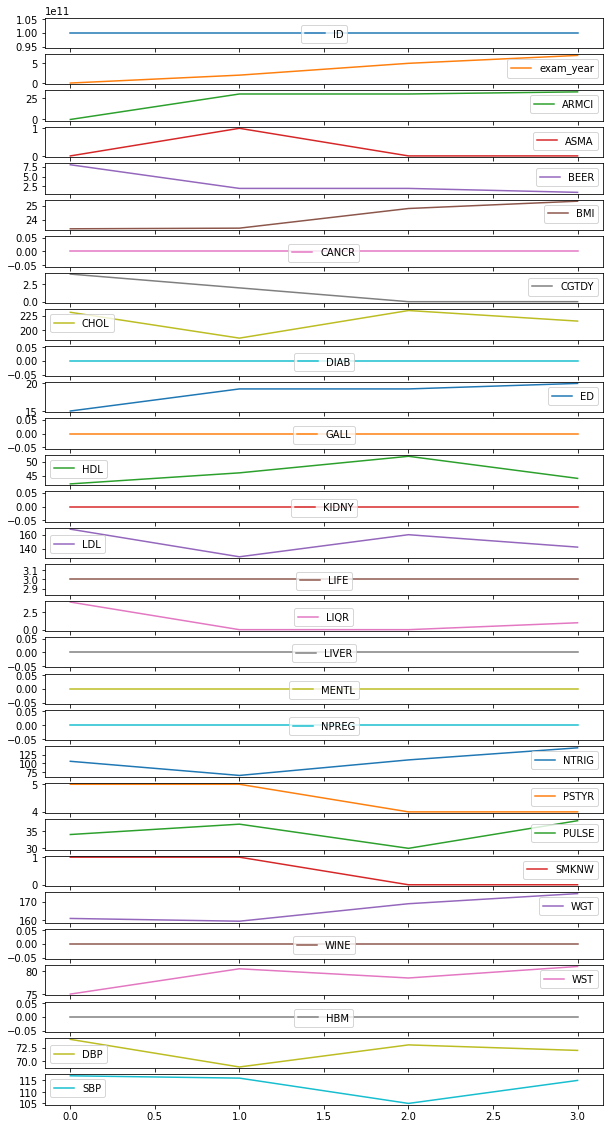

In [96]:
data_ts[data_ts['ID'] == data_ts['ID'].unique()[0]].plot(subplots=True, sharex=True, figsize=(10,20))
plt.show()

In [155]:
extracted_features = extract_features(data_ts, column_id="ID", column_sort="exam_year")

Feature Extraction: 100%|███████████████████████| 20/20 [09:25<00:00, 28.25s/it]


In [156]:
extracted_features

,ARMCI__variance_larger_than_standard_deviation,ARMCI__has_duplicate_max,ARMCI__has_duplicate_min,ARMCI__has_duplicate,ARMCI__sum_values,ARMCI__abs_energy,ARMCI__mean_abs_change,ARMCI__mean_change,ARMCI__mean_second_derivative_central,ARMCI__median,...,SBP__permutation_entropy__dimension_5__tau_1,SBP__permutation_entropy__dimension_6__tau_1,SBP__permutation_entropy__dimension_7__tau_1,SBP__query_similarity_count__query_None__threshold_0.0,"SBP__matrix_profile__feature_""min""__threshold_0.98","SBP__matrix_profile__feature_""max""__threshold_0.98","SBP__matrix_profile__feature_""mean""__threshold_0.98","SBP__matrix_profile__feature_""median""__threshold_0.98","SBP__matrix_profile__feature_""25""__threshold_0.98","SBP__matrix_profile__feature_""75""__threshold_0.98"
100033323702,1.0,0.0,0.0,1.0,92.5,2856.25,10.833333,10.833333,-6.875000,30.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100056526386,0.0,1.0,0.0,1.0,218.0,7923.50,1.000000,-0.200000,0.187500,36.50,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100061300991,1.0,1.0,0.0,1.0,195.5,6402.25,1.200000,1.200000,-0.125000,33.25,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100080112533,1.0,0.0,1.0,1.0,150.0,4522.00,1.250000,1.250000,0.166667,29.00,...,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100101126081,1.0,0.0,0.0,1.0,246.0,12136.00,2.750000,1.250000,-1.166667,49.00,...,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416752023336,1.0,0.0,0.0,1.0,183.0,5591.00,1.200000,0.800000,0.125000,30.00,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416761219907,1.0,0.0,1.0,1.0,157.5,4145.25,1.200000,0.800000,0.187500,26.00,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416783315386,0.0,0.0,1.0,1.0,77.0,1979.00,1.000000,-1.000000,1.000000,25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416796224310,1.0,0.0,0.0,0.0,198.5,7929.25,2.875000,1.875000,-0.750000,41.00,...,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
extracted_features_with_ID = extracted_features.reset_index(level=0, inplace=False)
extracted_features_with_ID = extracted_features_with_ID.rename(columns={"index": "ID"})
extracted_features_with_ID['ID'] = extracted_features_with_ID['ID'].astype(int).astype(str)
extracted_features_with_ID


,ID,ARMCI__variance_larger_than_standard_deviation,ARMCI__has_duplicate_max,ARMCI__has_duplicate_min,ARMCI__has_duplicate,ARMCI__sum_values,ARMCI__abs_energy,ARMCI__mean_abs_change,ARMCI__mean_change,ARMCI__mean_second_derivative_central,...,SBP__permutation_entropy__dimension_5__tau_1,SBP__permutation_entropy__dimension_6__tau_1,SBP__permutation_entropy__dimension_7__tau_1,SBP__query_similarity_count__query_None__threshold_0.0,"SBP__matrix_profile__feature_""min""__threshold_0.98","SBP__matrix_profile__feature_""max""__threshold_0.98","SBP__matrix_profile__feature_""mean""__threshold_0.98","SBP__matrix_profile__feature_""median""__threshold_0.98","SBP__matrix_profile__feature_""25""__threshold_0.98","SBP__matrix_profile__feature_""75""__threshold_0.98"
0,100033323702,1.0,0.0,0.0,1.0,92.5,2856.25,10.833333,10.833333,-6.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100056526386,0.0,1.0,0.0,1.0,218.0,7923.50,1.000000,-0.200000,0.187500,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100061300991,1.0,1.0,0.0,1.0,195.5,6402.25,1.200000,1.200000,-0.125000,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100080112533,1.0,0.0,1.0,1.0,150.0,4522.00,1.250000,1.250000,0.166667,...,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100101126081,1.0,0.0,0.0,1.0,246.0,12136.00,2.750000,1.250000,-1.166667,...,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,416752023336,1.0,0.0,0.0,1.0,183.0,5591.00,1.200000,0.800000,0.125000,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3546,416761219907,1.0,0.0,1.0,1.0,157.5,4145.25,1.200000,0.800000,0.187500,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3547,416783315386,0.0,0.0,1.0,1.0,77.0,1979.00,1.000000,-1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3548,416796224310,1.0,0.0,0.0,0.0,198.5,7929.25,2.875000,1.875000,-0.750000,...,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
extracted_features.loc[extracted_features.index == 204337013307]

,ARMCI__variance_larger_than_standard_deviation,ARMCI__has_duplicate_max,ARMCI__has_duplicate_min,ARMCI__has_duplicate,ARMCI__sum_values,ARMCI__abs_energy,ARMCI__mean_abs_change,ARMCI__mean_change,ARMCI__mean_second_derivative_central,ARMCI__median,...,SBP__permutation_entropy__dimension_5__tau_1,SBP__permutation_entropy__dimension_6__tau_1,SBP__permutation_entropy__dimension_7__tau_1,SBP__query_similarity_count__query_None__threshold_0.0,"SBP__matrix_profile__feature_""min""__threshold_0.98","SBP__matrix_profile__feature_""max""__threshold_0.98","SBP__matrix_profile__feature_""mean""__threshold_0.98","SBP__matrix_profile__feature_""median""__threshold_0.98","SBP__matrix_profile__feature_""25""__threshold_0.98","SBP__matrix_profile__feature_""75""__threshold_0.98"
204337013307,0.0,1.0,0.0,1.0,144.5,3483.25,1.1,-0.3,0.1875,24.0,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
extracted_features_with_ID.loc[extracted_features_with_ID['ID'] == '204337013307']

,ID,ARMCI__variance_larger_than_standard_deviation,ARMCI__has_duplicate_max,ARMCI__has_duplicate_min,ARMCI__has_duplicate,ARMCI__sum_values,ARMCI__abs_energy,ARMCI__mean_abs_change,ARMCI__mean_change,ARMCI__mean_second_derivative_central,...,SBP__permutation_entropy__dimension_5__tau_1,SBP__permutation_entropy__dimension_6__tau_1,SBP__permutation_entropy__dimension_7__tau_1,SBP__query_similarity_count__query_None__threshold_0.0,"SBP__matrix_profile__feature_""min""__threshold_0.98","SBP__matrix_profile__feature_""max""__threshold_0.98","SBP__matrix_profile__feature_""mean""__threshold_0.98","SBP__matrix_profile__feature_""median""__threshold_0.98","SBP__matrix_profile__feature_""25""__threshold_0.98","SBP__matrix_profile__feature_""75""__threshold_0.98"
1110,204337013307,0.0,1.0,0.0,1.0,144.5,3483.25,1.1,-0.3,0.1875,...,0.693147,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# remove nonunique columns:
extracted_features_drop_nonunique = extracted_features.loc[:,extracted_features.nunique()!=1]
extracted_features_drop_nonunique.shape

(3550, 20775)

In [30]:
# remove columns with NaN values
extracted_features_drop_nonunique_dropna = extracted_features_drop_nonunique.dropna(axis=1, how='any')
extracted_features_drop_nonunique_dropna.shape

(3550, 4759)

In [32]:
# remove correlated features:
def remove_correlated_features(df, corr_thres = 0.95, corr_method = 'spearman'):
    corr_matrix = df.corr(method = corr_method).abs()
    # Select upper triangle of correlation matrix
    # upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    upper = corr_matrix.where((np.triu(np.ones(corr_matrix.shape), k=1) + np.tril(np.ones(corr_matrix.shape), k=-1)).astype(bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > corr_thres)]

    # Drop features 
    return(df.drop(to_drop, axis=1, inplace=False))


In [33]:
extracted_features_drop_nonunique_dropna_drop_correlated = remove_correlated_features(extracted_features_drop_nonunique_dropna)
extracted_features_drop_nonunique_dropna_drop_correlated.shape

(3550, 2221)

In [80]:
extracted_features_drop_nonunique_dropna_drop_correlated.to_csv(load_dir+'/tsfresh_features_drop_nonunique_dropna_rm_corr.csv')

In [97]:
# y_ts = data.drop_duplicates(subset=['ID'], keep='first') 
# y_ts = y_ts[['ID', 'event']]
# y_ts = y_ts.set_index('ID')#.reset_index(drop=True)
# y_ts = y_ts.squeeze()
# y_ts

ID
100033323702    0
100056526386    0
100061300991    0
100080112533    0
100101126081    0
               ..
416752023336    0
416761219907    0
416783315386    0
416796224310    0
416817227898    0
Name: event, Length: 3550, dtype: int64

In [98]:
# load training id:
training_id_file_name = 'all_training_set_ID'
validation_id_file_name = 'all_validation_set_ID'
testing_id_file_name = 'all_testing_set_ID'
loaddir = work_dir+ '/csv_files'
trainingid_all = pd.read_csv(loaddir+'/'+training_id_file_name+'.csv')
validationid_all = pd.read_csv(loaddir+'/'+validation_id_file_name+'.csv')
testingid_all = pd.read_csv(loaddir+'/'+testing_id_file_name+'.csv')


fold = 0
trainingid = trainingid_all.iloc[:,fold].values
validationid = validationid_all.iloc[:,fold].values
testingid = testingid_all.iloc[:,fold].values

total_training_id = np.concatenate([trainingid,validationid])


In [99]:
y_ts_training = data.drop_duplicates(subset=['ID'], keep='first') 
y_ts_training = y_ts_training[['ID', 'event']].loc[y_ts_training['ID'].isin(total_training_id)]
y_ts_training = y_ts_training.set_index('ID')#.reset_index(drop=True)
y_ts_training = y_ts_training.squeeze()
y_ts_training.shape

(2837,)

In [52]:
extracted_features_drop_nonunique_dropna_training = extracted_features_drop_nonunique_dropna.loc[extracted_features_drop_nonunique_dropna.index.isin(total_training_id),:]
extracted_features_drop_nonunique_dropna_training.shape

(2581, 4759)

In [101]:
extracted_features_drop_nonunique_dropna_drop_correlated_training = extracted_features_drop_nonunique_dropna_drop_correlated.loc[extracted_features_drop_nonunique_dropna_drop_correlated.index.isin(total_training_id),:]
extracted_features_drop_nonunique_dropna_drop_correlated_training.shape

(2581, 2221)

In [53]:
extracted_features_drop_nonunique_dropna_training_rm_nonrelevant = tsfresh.select_features(extracted_features_drop_nonunique_dropna_training, y_ts_training)
extracted_features_drop_nonunique_dropna_training_rm_nonrelevant.shape

(2581, 504)

In [54]:
extracted_features_drop_nonunique_dropna_training_rm_nonrelevant_drop_correlated = remove_correlated_features(extracted_features_drop_nonunique_dropna_training_rm_nonrelevant)
extracted_features_drop_nonunique_dropna_training_rm_nonrelevant_drop_correlated.shape

(2581, 87)

In [85]:
extracted_features_drop_nonunique_dropna_training_rm_nonrelevant_drop_correlated.columns.values.sort()
extracted_features_drop_nonunique_dropna_training_rm_nonrelevant_drop_correlated.columns.values

array(['ARMCI__benford_correlation',
       'ARMCI__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'BMI__benford_correlation',
       'BMI__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'CGTDY__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0',
       'CGTDY__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0',
       'CGTDY__first_location_of_maximum', 'CGTDY__has_duplicate_min',
       'CGTDY__last_location_of_minimum', 'CGTDY__minimum',
       'CGTDY__number_cwt_peaks__n_5',
       'CGTDY__ratio_value_number_to_time_series_length',
       'CGTDY__symmetry_looking__r_0.15000000000000002', 'DBP__c3__lag_2',
       'DBP__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0',
       'DBP__time_reversal_asymmetry_statistic__lag_1', 'DIAB__c3__lag_1',
       'DIAB__c3__lag_2',
       'DIAB__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0',
       'DIAB__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4',
     

In [87]:
extracted_features_drop_nonunique_dropna_training_rm_nonrelevant_drop_correlated.to_csv(load_dir+'/tsfresh_features_extracted_features_drop_nonunique_dropna_training_rm_nonrelevant_drop_correlated.csv')

## Use tsfresh automatic extract_relevant_features function:

In [161]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(data_ts.loc[data_ts['ID'].isin(total_training_id)]
                                                     , y_ts_training
                                                     , column_id='ID', column_sort='exam_year')

Feature Extraction: 100%|███████████████████████| 20/20 [07:12<00:00, 21.63s/it]


In [163]:
features_filtered_direct.shape

(2837, 1050)

In [164]:
features_filtered_direct[features_filtered_direct.index == 204337013307]

,HBM__root_mean_square,HBM__count_below__t_0,HBM__mean,HBM__quantile__q_0.9,HBM__value_count__value_1,HBM__abs_energy,"HBM__fft_coefficient__attr_""abs""__coeff_0","HBM__fft_coefficient__attr_""real""__coeff_0",HBM__sum_values,"HBM__agg_autocorrelation__f_agg_""var""__maxlag_40",...,"CGTDY__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","NTRIG__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""var""","NTRIG__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","KIDNY__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0",DIAB__longest_strike_below_mean,"DIAB__fft_coefficient__attr_""angle""__coeff_1",LIQR__c3__lag_1,ED__median,"KIDNY__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","KIDNY__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0"
204337013307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1534.24,1534.24,0.0,0.0,0.0,0.0,18.0,0.0,0.0


In [129]:
features_filtered_direct_with_ID.columns.values

array(['index', 'HBM__mean', 'HBM__count_below__t_0', ..., 'ED__median',
       'KIDNY__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0',
       'KIDNY__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0'],
      dtype=object)

In [167]:
full_data_features_filtered_direct = extracted_features[features_filtered_direct.columns.values]
full_data_features_filtered_direct.shape

(3550, 1050)

In [168]:
full_data_features_filtered_direct

,HBM__root_mean_square,HBM__count_below__t_0,HBM__mean,HBM__quantile__q_0.9,HBM__value_count__value_1,HBM__abs_energy,"HBM__fft_coefficient__attr_""abs""__coeff_0","HBM__fft_coefficient__attr_""real""__coeff_0",HBM__sum_values,"HBM__agg_autocorrelation__f_agg_""var""__maxlag_40",...,"CGTDY__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","NTRIG__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""var""","NTRIG__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","KIDNY__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0",DIAB__longest_strike_below_mean,"DIAB__fft_coefficient__attr_""angle""__coeff_1",LIQR__c3__lag_1,ED__median,"KIDNY__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","KIDNY__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0"
100033323702,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,NaN,NaN,0.0,0.0,0.0,0.00,19.0,0.0,0.0
100056526386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-782.96,782.96,0.0,0.0,0.0,0.00,15.0,0.0,0.0
100061300991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.666667,-6482.96,6482.96,0.0,0.0,0.0,11.25,14.0,0.0,0.0
100080112533,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,NaN,NaN,0.0,0.0,0.0,0.00,12.0,0.0,0.0
100101126081,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,NaN,NaN,0.0,0.0,0.0,0.00,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416752023336,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-237.04,237.04,0.0,0.0,0.0,0.00,17.5,0.0,0.0
416761219907,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-3318.56,3318.56,0.0,0.0,0.0,0.00,18.0,0.0,0.0
416783315386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,NaN,NaN,0.0,0.0,0.0,0.00,16.0,0.0,0.0
416796224310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,NaN,NaN,0.0,0.0,0.0,0.00,13.0,0.0,0.0


In [169]:
full_data_features_filtered_direct.loc[full_data_features_filtered_direct.index == 204337013307]

,HBM__root_mean_square,HBM__count_below__t_0,HBM__mean,HBM__quantile__q_0.9,HBM__value_count__value_1,HBM__abs_energy,"HBM__fft_coefficient__attr_""abs""__coeff_0","HBM__fft_coefficient__attr_""real""__coeff_0",HBM__sum_values,"HBM__agg_autocorrelation__f_agg_""var""__maxlag_40",...,"CGTDY__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","NTRIG__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""var""","NTRIG__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","KIDNY__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0",DIAB__longest_strike_below_mean,"DIAB__fft_coefficient__attr_""angle""__coeff_1",LIQR__c3__lag_1,ED__median,"KIDNY__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","KIDNY__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0"
204337013307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1534.24,1534.24,0.0,0.0,0.0,0.0,18.0,0.0,0.0


In [170]:
# remove columns with NaN values:
full_data_features_filtered_direct_drop_na = full_data_features_filtered_direct.dropna(axis=1, how='any')
full_data_features_filtered_direct_drop_na.shape

(3550, 612)

In [173]:
full_data_features_filtered_direct_drop_na.to_csv(load_dir+'/tsfresh_features_extract_relevant_drop_na_2.csv')

In [176]:
full_data_features_filtered_direct_dropna_rm_corr = remove_correlated_features(full_data_features_filtered_direct_drop_na, corr_thres = 0.97)
full_data_features_filtered_direct_dropna_rm_corr.shape

(3550, 149)

In [177]:
full_data_features_filtered_direct_dropna_rm_corr.loc[full_data_features_filtered_direct_dropna_rm_corr.index == 204337013307]

,HBM__ratio_beyond_r_sigma__r_1,"HBM__agg_autocorrelation__f_agg_""mean""__maxlag_40",HBM__last_location_of_minimum,HBM__quantile__q_0.8,HBM__first_location_of_maximum,HBM__ratio_beyond_r_sigma__r_1.5,SBP__c3__lag_1,HBM__quantile__q_0.7,HBM__quantile__q_0.6,DBP__c3__lag_1,...,"WST__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)",WINE__value_count__value_1,HBM__last_location_of_maximum,PSTYR__minimum,"SBP__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0","DBP__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0","ARMCI__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)",CGTDY__binned_entropy__max_bins_10,"CGTDY__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0",LIQR__c3__lag_1
204337013307,0.0,0.0,1.0,0.0,0.0,0.0,1103167.0,0.0,0.0,263085.0,...,39.268633,0.0,1.0,1.0,10.8,7.0,14.641533,0.636514,0.0,0.0


In [178]:
full_data_features_filtered_direct_dropna_rm_corr.to_csv(load_dir+'/tsfresh_features_extract_relevant_drop_na_rm_corr_expanded_var_2.csv')